# Análise de Sentimento

In [1]:
# importações
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [2]:
dataset=pd.read_csv('/home/amador/dados/Tweets_Mg.csv',encoding='utf-8')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [4]:
# Expandindo o tamanho da exibição de coluna de texto
pd.set_option('display.max_colwidth', 1)
dataset.Text.head(100)

0     ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                                         
1     � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                             
2     �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                                            
3     ��� https://t.co/BnDsO34qK0                                                                                                                
4     ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5             
                                                                   ...                                                                           
95    #noticiasdorenan Uso de depósitos judiciais pelo governo tem nova polêmica em MG: O Banco… https://t.co/kHuZpKQaj5    

In [5]:
# dropando linhas duplicadas com o parâmetro drop_duplicates
dataset.drop_duplicates(['Text'],inplace=True)

In [6]:
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude     104 
Geo Coordinates.longitude    104 
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                   1   
Unnamed: 10                  0   
Unnamed: 11                  0   
Unnamed: 12                  0   
Unnamed: 13                  0   
Unnamed: 14                  0   
Unnamed: 15                  0   
Unnamed: 16                  0   
Unnamed: 17                  0   
Unnamed: 18                  0   
Unnamed: 19                  0   
Unnamed: 20                  0   
Unnamed: 21                  0   
Unnamed: 22                  0   
Unnamed: 23                  0   
Unnamed: 24                  0   
dtype: int64

In [7]:
# removendo colunas de desnecessárias
for i in dataset.columns.values: #dataset.columns.values retorna o nome de cada coluna
    if i.startswith('Unnamed'):# método startswith retornará True se a sequência começar com o valor especificado, caso contrário, False.
        dataset.drop(i, axis=1, inplace=True)
        print ('Coluna Deletada:', i)

Coluna Deletada: Unnamed: 0
Coluna Deletada: Unnamed: 10
Coluna Deletada: Unnamed: 11
Coluna Deletada: Unnamed: 12
Coluna Deletada: Unnamed: 13
Coluna Deletada: Unnamed: 14
Coluna Deletada: Unnamed: 15
Coluna Deletada: Unnamed: 16
Coluna Deletada: Unnamed: 17
Coluna Deletada: Unnamed: 18
Coluna Deletada: Unnamed: 19
Coluna Deletada: Unnamed: 20
Coluna Deletada: Unnamed: 21
Coluna Deletada: Unnamed: 22
Coluna Deletada: Unnamed: 23
Coluna Deletada: Unnamed: 24


In [8]:
dataset.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação'],
      dtype='object')

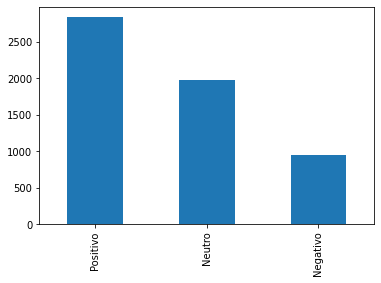

In [9]:
# distribuição das classes
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar');

In [10]:
# separando tweets de classes
tweets = dataset['Text']
classes = dataset['Classificacao']

In [11]:
# gerando o modelo, vetorizando binariamente os dados
vectorizer = CountVectorizer(analyzer="word") # instanciando o método
# analyzer="word" para analisar palavra por palavra
freq_tweets = vectorizer.fit_transform(tweets) # transformando os dados

In [12]:
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [13]:
# forma ou tamanho da matriz (linhasxcolunas)
freq_tweets.shape

(5765, 13029)

In [14]:
# imprimindo valores da matriz esparsa
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Machine Learning

In [15]:
# criando o modelo com naive bayes multinomial
modelo=MultinomialNB()
# treinando o modelo
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [16]:
# testando com algumas instãncias
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [17]:
# transformando os dados de teste em vetores de palavras
freq_testes=vectorizer.transform(testes)
# observe que aqui é vectorizer.transform e não vectorizer.fit.transform

In [18]:
# fazendo a classificação com o modelo
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)
# somente modelo.predict(freq_testes) retornaria uma lista com as classificações

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro


In [19]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)
# round 2 é para arredondar para dois valores após a virgula

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

### Validação

In [20]:
# cross validation --> classificador, features, classes, nº de folds
resultados=cross_val_predict(modelo,freq_tweets,classes,cv=10)
# retorna o resultado médio

In [21]:
# matriz de confusão
print(pd.crosstab(classes,resultados,rownames=['Real'],colnames=['Predito'],margins=True))
# margins=True é para exibir o All

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo  846       100     5         951 
Neutro    206       1656    112       1974
Positivo  53        294     2493      2840
All       1105      2050    2610      5765


In [22]:
sentimento=['Positivo','Negativo','Neutro']
# classes, cross val, nome das colunas (nesse caso, linhas)
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.88      0.91      2840
    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



/home/amador/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


### Tunning

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# alpha força o aumento do peso que o algoritmo vai dar para dados em que não há classe que o defina
lista_alpha = list(range(1,11))
lista_alpha

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
# criando  dicionário com o parâmetro
parametros_grid=dict(alpha=lista_alpha)

In [26]:
# instanciando um modelo
nvModelo=MultinomialNB()

In [27]:
# criando o objeto grid
# classificador, dicionário com parâmetro, nº de folds, métrica de avaliação
grid=GridSearchCV(nvModelo,parametros_grid,cv=10,scoring='accuracy')

In [28]:
tweets.head()

0    ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                            
1    � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                
2    �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                               
3    ��� https://t.co/BnDsO34qK0                                                                                                   
4    ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5
Name: Text, dtype: object

In [29]:
# rodando o grid
# vetorizando novamente os tweets
freq_tweets=vectorizer.fit_transform(tweets)
# treinando o grid com dados vetorizados e as classes
grid.fit(freq_tweets,classes)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [30]:
# melhores scores
grid.cv_results_

{'mean_fit_time': array([0.01475196, 0.01474483, 0.01547821, 0.01589029, 0.0148629 ,
        0.01569502, 0.01720822, 0.01663325, 0.01671281, 0.01504359]),
 'std_fit_time': array([0.00041844, 0.00022781, 0.00149994, 0.0002315 , 0.00055842,
        0.00056327, 0.00195644, 0.00023027, 0.00070101, 0.00037017]),
 'mean_score_time': array([0.00092206, 0.00092268, 0.00099204, 0.00100219, 0.0009223 ,
        0.00100648, 0.00110226, 0.00118618, 0.00119805, 0.00093498]),
 'std_score_time': array([2.31760028e-05, 9.53555100e-06, 8.97593516e-05, 1.03396189e-04,
        8.93875737e-06, 1.25027633e-04, 2.50598247e-04, 3.51321095e-04,
        2.86839826e-04, 1.08070700e-05]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4},
  {'alpha': 5},
  {'alpha'

In [31]:
# melhor parâmetro
grid.best_params_

{'alpha': 1}

In [32]:
# melhor score
grid.best_score_

0.8664846307529368


Alterando o parâmetro alpha arbitrariamente para mostrar a sensibilidade do algoritmo às mudanças de parâmetro

In [33]:
# instanciando o vectorizer
vectorizer = CountVectorizer(analyzer="word")
# transformando
freq_tweets = vectorizer.fit_transform(tweets)
# instanciando o classificador
modelo = MultinomialNB(alpha=5)
# treinando o classificador
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=5)

In [34]:
# vetorizando os testes
freq_testes = vectorizer.transform(testes)

In [35]:
# predição
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

In [36]:
# fazendo validação dos resultados
# cross validation com classificador treinado, features,classes e nº de folds
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)
#metricas
sentimento=['Positivo','Negativo','Neutro']
print(metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.89      0.92      0.90      2840
    Negativo       0.84      0.78      0.81       951
      Neutro       0.79      0.79      0.79      1974

    accuracy                           0.85      5765
   macro avg       0.84      0.83      0.83      5765
weighted avg       0.85      0.85      0.85      5765



/home/amador/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
